**Importing the Dependencies** 

In [58]:
import re
import numpy as np
import pandas as pd
#plotting
import seaborn as sns
from wordcloud import WordCloud   
import matplotlib.pyplot as plt
# nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
# sklearn is the widely used machine learning library 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer     #conversion of text data into numerical form 
from sklearn.metrics import accuracy_score       

**Data Processing**

In [3]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
df = pd.read_csv("C:/hotel/training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1", names=DATASET_COLUMNS)  #forward slas
df.sample(5) 

,target,ids,date,flag,user,text
760314,0,2296674592,Tue Jun 23 09:28:40 PDT 2009,NO_QUERY,rachelinajolie,i slept for an hour and now i'm wide awake des...
807249,4,1468955799,Tue Apr 07 04:34:38 PDT 2009,NO_QUERY,Miahpeah,"Follow me, hustlers"
462567,0,2174723711,Sun Jun 14 23:10:11 PDT 2009,NO_QUERY,Killaya,"@she_shines92 I know Well.. yeah. I mean, yo..."
409974,0,2059766099,Sat Jun 06 17:35:37 PDT 2009,NO_QUERY,elcarlitoxloco,I really want a danboard
152540,0,1932760824,Tue May 26 22:09:30 PDT 2009,NO_QUERY,pridey77,"just detailed the car, lucky because it's now ..."


In [4]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [6]:
print("The length of the data is ",len(df))

The length of the data is  1048576


In [7]:
df.shape

(1048576, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [9]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [10]:
#Counting no of missing value in the dataset
df.isnull().sum() 

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [11]:
np.sum(df.isnull().any(axis = 1)) #along row  

0

In [12]:
df["target"].unique()      # In target column the unique elements 

array([0, 4], dtype=int64)

In [13]:
#checking the distribution of the target column 
df["target"].value_counts()  

target
0    800000
4    248576
Name: count, dtype: int64

In [14]:
#convert the target value from "4" to "1" for positive tweet 
df.replace({"target":{4:1}},inplace=True)

In [14]:
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1048571,1,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048572,1,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048573,1,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048574,1,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [18]:
df["target"].nunique()   #number of uniqe values present in the "target" column 

2

<Axes: xlabel='target', ylabel='count'>

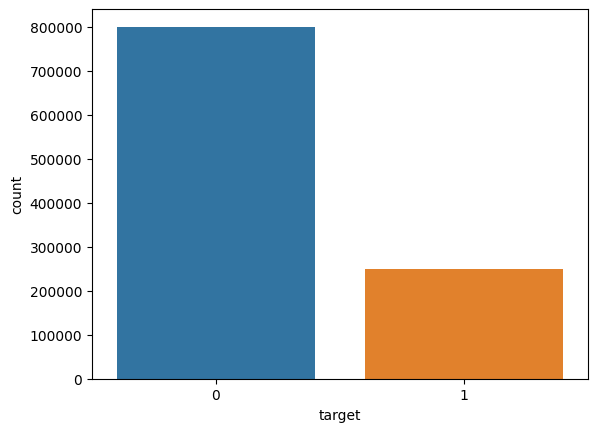

In [84]:
sns.countplot(x='target', data=df)

In [ ]:
df['target'].unique()

In [15]:
import nltk
nltk.download('stopwords')  #stopwords are the words which does not require for sentiment analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\babum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
print(stopwords.words('English'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
data=df[['text','target']] 
print(data)

                                                      text  target
0        @switchfoot http://twitpic.com/2y1zl - Awww, t...       0
1        is upset that he can't update his Facebook by ...       0
2        @Kenichan I dived many times for the ball. Man...       0
3          my whole body feels itchy and like its on fire        0
4        @nationwideclass no, it's not behaving at all....       0
...                                                    ...     ...
1048571           My GrandMa is making Dinenr with my Mum        1
1048572  Mid-morning snack time... A bowl of cheese noo...       1
1048573  @ShaDeLa same here  say it like from the Termi...       1
1048574             @DestinyHope92 im great thaanks  wbuu?       1
1048575               cant wait til her date this weekend        1

[1048576 rows x 2 columns]


In [18]:
data['target'].unique()

array([0, 1], dtype=int64)

In [61]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [20]:
data_pos = data_pos.iloc[:int(30000)]
data_neg = data_neg.iloc[:int(30000)]


In [21]:
dataset = pd.concat([data_pos, data_neg]) 

In [22]:
port_stem = PorterStemmer()  

In [23]:
def stemming(content):
    stemmed_content  = re.sub('[^a-zA-Z]',' ',content) #except the alphabet character remove all the special character, number ,punctuation mark etc.. 
    stemmed_content  =  stemmed_content .lower() #converting all char. into lower case 
    stemmed_content  = stemmed_content  .split()  #split the sentence into list of words
    stemmed_content  = [port_stem.stem(word) for word in stemmed_content  if not word in stopwords.words('English')] 
    stemmed_content = " ".join( stemmed_content  )
    return  stemmed_content  

In [24]:
df.text[2]

'@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'

In [25]:
content_to_stem = df.text[2] 

# Call the stemming function
stemmed_result = stemming(content_to_stem)

# Print the stemmed content
print(stemmed_result)

kenichan dive mani time ball manag save rest go bound


In [70]:
dataset["Stemmed_content"] = dataset["text"].apply(stemming)
 

In [65]:
dataset.head(5)

,text,target,Stemmed_content
800000,I LOVE @Health4UandPets u guys r the best!!,1,love health uandpet u guy r best
800001,im meeting up with one of my besties tonight! ...,1,im meet one besti tonight cant wait girl talk
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1,darealsunisakim thank twitter add sunisa got m...
800003,Being sick can be really cheap when it hurts t...,1,sick realli cheap hurt much eat real food plu ...
800004,@LovesBrooklyn2 he has that effect on everyone,1,lovesbrooklyn effect everyon


In [66]:
#seperating the data and label
X=dataset['Stemmed_content'].values
Y=dataset['target'].values

In [67]:
print(X)     

['love health uandpet u guy r best'
 'im meet one besti tonight cant wait girl talk'
 'darealsunisakim thank twitter add sunisa got meet hin show dc area sweetheart'
 ... 'leav britney found jon new kid alway miss celeb'
 'neomic havta go pee im scare walk dwn hall pleas check mous im freak turn light'
 'nooooooooooooooo school today worst part wont abl tweet troughout day']


In [68]:
dataset.shape 

(60000, 3)

In [69]:
print(Y) 

[1 1 1 ... 0 0 0]


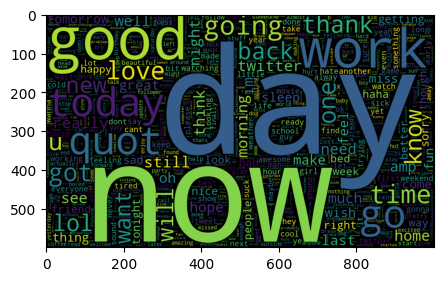

In [66]:
data_positive = dataset['text'][:80000]
wc = WordCloud(max_words = 1000 , width = 1000 , height = 600,
              collocations=False).generate(" ".join(data_positive))
plt.figure(figsize = (5,15))
plt.imshow(wc)  

In [32]:
#Splitting the data into train and test 
#stratify indicate the equal proportion og distribution f two classes in both train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y,  random_state =2)  

In [33]:
print(X_train) 

['hane bestest friend' 'noellegray haha mine transform accord small one'
 'pinot watch today home use support honda also big fan kimi fond hamilton sorri'
 ... 'brianviloria goodluck' 'richardblai chelseafc beat arsen case miss'
 'tiffanystarn halfway home bbq midciti one']


In [34]:
print(X_test) 

['nick carter honey must tell quot hi quot quot hello quot sign smoke cri'
 'piablo oo realli check tomorrow prolli wont tonight guess'
 'great mood morn mess way behind movi pretti much coolest peopl know' ...
 'sangitashr accept breath throat stomach never ktm'
 'hospit soon kinda suck allow eat anyth x'
 'thatgiirl listen regret http tinyurl com killthelight']


In [35]:
#Convert the textual data into numberical value 
vectorizer = TfidfVectorizer() 
X_train = vectorizer.fit_transform(X_train) 
X_test = vectorizer.transform(X_test)  

In [36]:
print(X_test) 

  (0, 36721)	0.20537972517588157
  (0, 34187)	0.27114307158386897
  (0, 33636)	0.24068306866202646
  (0, 30143)	0.6640557144290358
  (0, 26272)	0.2390150296030474
  (0, 25482)	0.21327576455771188
  (0, 16181)	0.2732756742111204
  (0, 15812)	0.21188937332952207
  (0, 15635)	0.2253126972176722
  (0, 7930)	0.21930341939236314
  (0, 5667)	0.25367505545143754
  (1, 41204)	0.3790953217205255
  (1, 37999)	0.27313498905778755
  (1, 37955)	0.25444805459757186
  (1, 30573)	0.24133423412925836
  (1, 29689)	0.46942204842776986
  (1, 27380)	0.48958618068656906
  (1, 14824)	0.3159981093902018
  (1, 6205)	0.31431114638714575
  (2, 40391)	0.24157088956384268
  (2, 29526)	0.27199428027112194
  (2, 28424)	0.2490355179332966
  (2, 25331)	0.2269952959650183
  (2, 25085)	0.2691105703101958
  (2, 24967)	0.22069625772668183
  :	:
  (11994, 6104)	0.3624848341894685
  (11994, 4941)	0.40598860374141205
  (11994, 4061)	0.36582546206403754
  (11995, 36926)	0.5618478662260453
  (11995, 2186)	0.8272405788023457
  (

**Training the Machine Learning Model**

In [38]:
model = LogisticRegression(max_iter = 1000 )   #model need to go through the data for max_iter times  for better understanding

In [39]:
model.fit(X_train,Y_train) 

LogisticRegression(max_iter=1000)

**Model Evaluation**

In [41]:
#Accuracy Score on the training Data
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train) 
training_data_accuracy = accuracy_score(Y_train,X_train_prediction) 

In [42]:
print("Accuracy score on the training data :",training_data_accuracy)

Accuracy score on the training data : 0.8285


In [45]:
#Accuracy score on the test data
X_test_prediction = model.predict(X_test) 
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [46]:
print("Accuracy score on the testing data :",test_data_accuracy)

Accuracy score on the testing data : 0.7505833333333334


**Model accuracy = 76 %**

**Saving the trained model**

In [47]:
import pickle

In [48]:
filename = "trained_model.sav"
pickle.dump(model,open(filename,'wb'))  # file in the writing mode 


**Using the saved model for fututre prediction**

In [49]:
#loading the saved model 
loaded_model = pickle.load(open('trained_model.sav','rb'))  #path  #reading file in binary 

In [74]:
X_new = X_test[100] 
print(Y_test[100]) 
prediction = model.predict(X_new)
print(prediction)   #predicted by the model 

if(prediction[0] == 0):
    print("Negative Tweet") 
else:
    print("Positive Tweet") 


1
[1]
Positive Tweet


In [72]:
X_new = X_test[7] 
print(Y_test[7]) 
prediction = model.predict(X_new)
print(prediction)   #predicted by the model 

if(prediction[0] == 0):
    print("Negative Tweet") 
else:
    print("Positive Tweet") 

0
[0]
Negative Tweet


                                          ******************************************                   